<a href="https://colab.research.google.com/github/lephuocdat2000/NhapmonCV/blob/master/Khanh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [38]:
import zipfile
import os
import re
import numpy as np
from PIL import Image
import cv2
from numpy import asarray
import matplotlib.pyplot as plt

# Read data

In [77]:
def UyXma(arr):
  uy=arr.sum()/len(arr)
  temp=(uy-arr)**2
  t=temp.sum()
  xma=math.sqrt(t*(1/len(arr)))
  return uy,xma
def array_selection(index,H_channel):
  if index==0: array = H_channel[H_channel!=0]
  elif index==1: array = H_channel[H_channel>150]
def Read_data(path_to_zip_file):
  imgzip = zipfile.ZipFile(path_to_zip_file)
  inflist = imgzip.infolist()
  Uyxma_list = np.zeros((7,1))
  for f in inflist:
       fruit = re.search('/(.*)/',f.filename).group(1)
       index = np.where(fruits==fruit)
       #Đọc ảnh -> array
       ifile = imgzip.open(f)
       image = asarray(Image.open(ifile))   
       #convert RGB -> HSV
       hsv = cv2.cvtColor(image,cv2.COLOR_RGB2HSV)
       plt.imshow(hsv)
       plt.show()
       #select H channel
       H_channel = hsv[:,:,0]
       


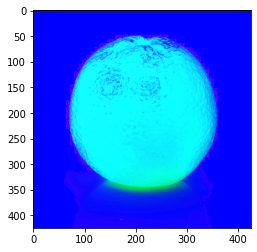

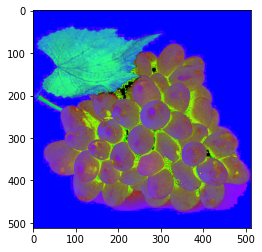

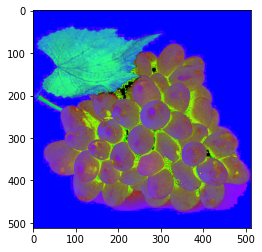

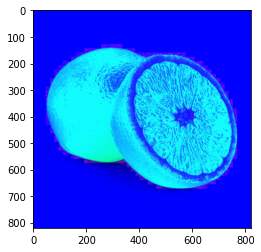

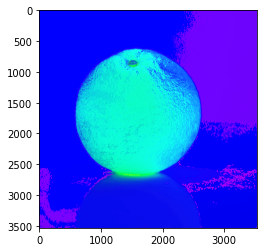

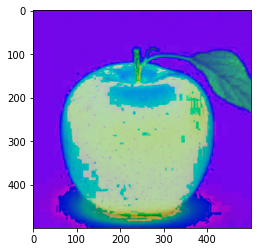

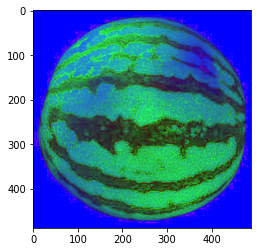

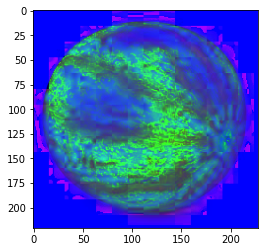

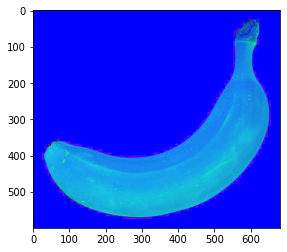

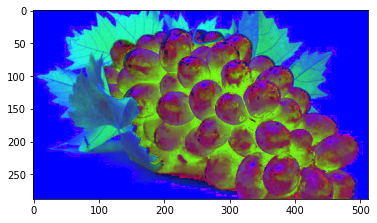

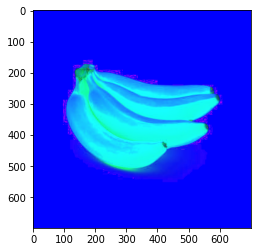

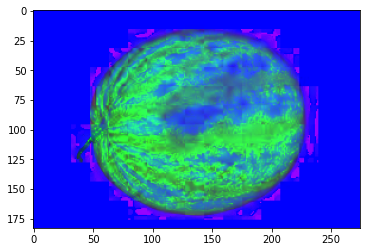

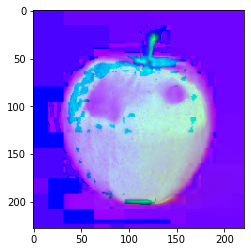

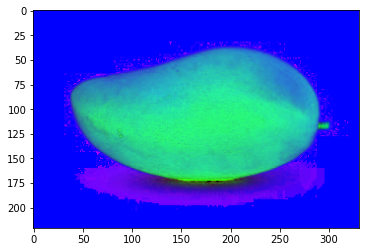

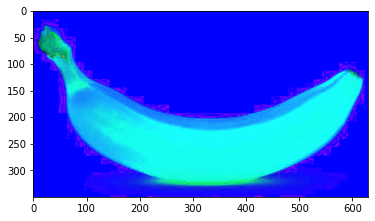

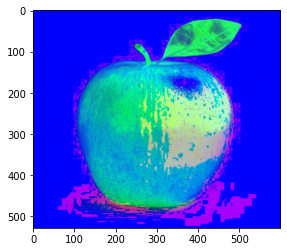

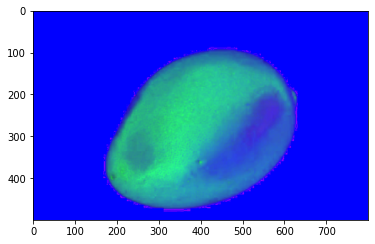

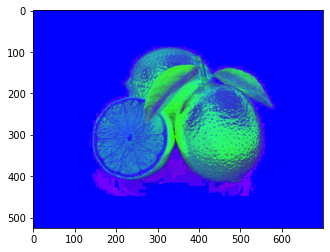

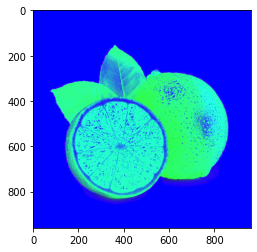

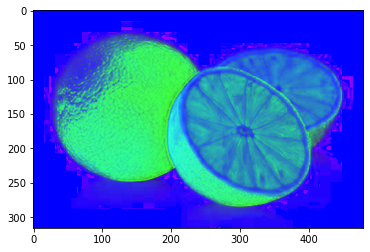

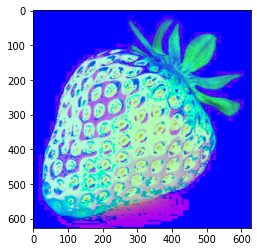

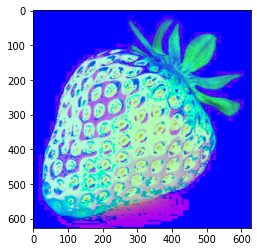

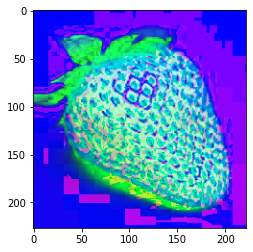

In [78]:
fruits = np.array(['Orange','Apple','Grape','Watermelon','Banana','Mango','Lemon','Strawberry'])
path_to_zip_file = '/content/drive/MyDrive/Data Khanh/Khanh.zip'
fruits_array = np.zeros((7,1))
Read_data(path_to_zip_file)


In [27]:
fruits_array = np.array([[],[],[],[],[],[],[]])
fruits_array.shape

(7, 0)

In [29]:
fruits_array[1]

array([], dtype=float64)

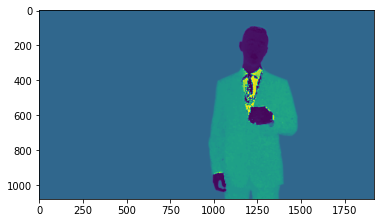

In [72]:
test=cv2.imread('/content/Fq8hA.png')
test = cv2.cvtColor(test,cv2.COLOR_BGR2HSV)
H_channel = test[:,:,0]
plt.imshow(H_channel)
plt.show()